In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [33]:
df=pd.read_csv('telecom_churn.csv')

In [20]:
df=df.drop_duplicates()

In [21]:
df.isnull().sum()

,0
customer_id,0
telecom_partner,0
gender,0
age,0
state,0
city,0
pincode,0
date_of_registration,0
num_dependents,0
estimated_salary,0


In [34]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})


In [35]:
df = pd.get_dummies(df, columns=['telecom_partner'], drop_first=True)


In [36]:
df = pd.get_dummies(df, columns=['state', 'city'], drop_first=True)


In [37]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])
df['registration_year'] = df['date_of_registration'].dt.year

In [38]:
df = df.drop('date_of_registration', axis=1)


In [41]:
count=np.count_nonzero(df['churn'])
count

48827

In [42]:
x=df.drop('churn',axis=1)
y=df['churn']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#

In [45]:
model = DecisionTreeClassifier()


In [47]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [50]:
y_pred = model.predict(x_test)


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.670772515448256


In [53]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79     38928
           1       0.21      0.22      0.22      9783

    accuracy                           0.67     48711
   macro avg       0.50      0.50      0.50     48711
weighted avg       0.68      0.67      0.68     48711



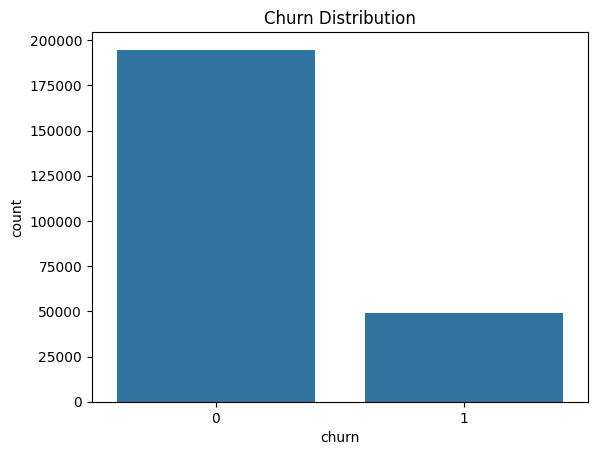

In [54]:
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


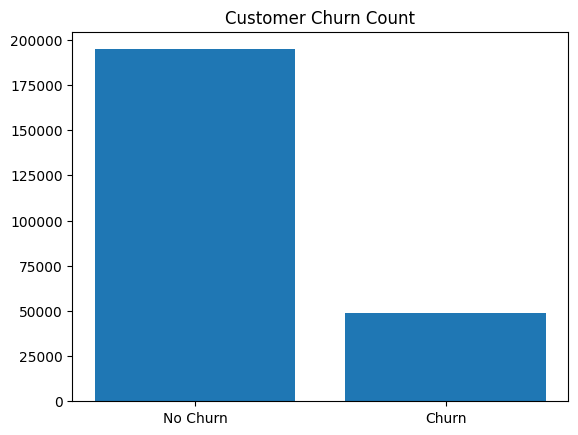

In [56]:
plt.bar(['No Churn','Churn'], df['churn'].value_counts())
plt.title("Customer Churn Count")
plt.show()
